# Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor Romney or Obama?
    3.) How do undecided voters effect the poll?
    4.) Can we account for the undecided voters?
    5.) How did voter sentiment change over time?
    6.) Can we see an effect in the polls from the debates?

We'll discuss the second data set later on!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

The data for the polls will be obtained from HuffPost Pollster. You can check their website [here](http://elections.huffingtonpost.com/pollster). There are some pretty awesome politcal data stes to play with there so I encourage you to go and mess around with it yourself after completing this project.

In [2]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

Now that we have our data, we can set it as a DataFrame.

In [4]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [5]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {poll_df.shape}\n=================================")
print(f"DataFrame info : {poll_df.info()}\n=================================")
print(f"DataFrame columns : \n{poll_df.columns}\n=================================")
print(f"The type of each column : \n{poll_df.dtypes}\n=================================")
print(f"How much missing value in every column : \n{poll_df.isna().sum()}\n=================================")

DataFrame shape : (586, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB
DataFrame info : N

In [6]:
# the values of the "Question Text" are NaN values, let drop this column.
poll_df.drop('Question Text', inplace=True, axis='columns')
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Iteration'],
      dtype='object')

Let's go ahead and get a quick visualization overview of the affiliation for the polls.

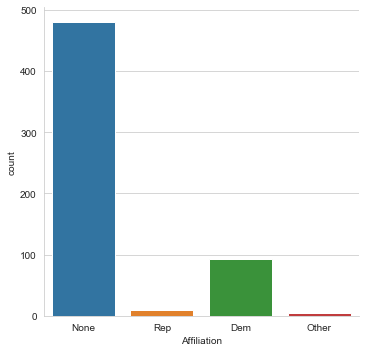

In [7]:
# Factorplot the affiliation
sns.catplot('Affiliation', data=poll_df, kind='count')

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

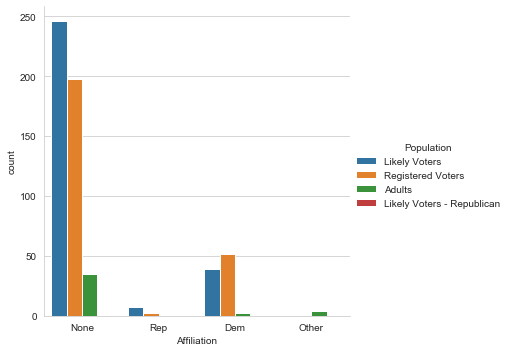

In [8]:
# Factorplot the affiliation by Population
sns.catplot('Affiliation', data=poll_df, hue='Population', kind='count')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

In [9]:
# Let's look at the DataFrame again
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


Let's go ahead and take a look at the averages for Obama, Romney , and the polled people who remained undecided.

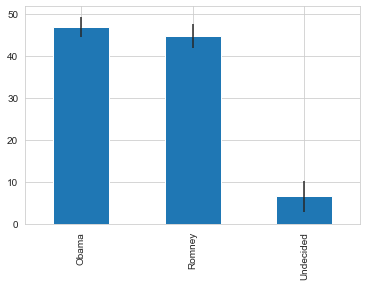

In [10]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations', 'Other', 'Question Iteration'], 
         axis=0, inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations', 'Other', 'Question Iteration'], 
         axis=0, inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std, kind='bar', legend=False)

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

In [11]:
# Concatinating our average and std DataFrames
poll_avg = pd.concat([avg, std], axis=1)

# Renaming the columns
poll_avg.columns = ['Average', 'STD']

poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [12]:
# let take a look on the data
poll_df['Start Date']

0      2012-11-04
1      2012-11-03
2      2012-11-03
3      2012-11-03
4      2012-11-03
          ...    
581    2009-07-15
582    2009-06-12
583    2009-05-14
584    2009-04-17
585    2009-03-13
Name: Start Date, Length: 586, dtype: object

If we wanted to, we could also do a quick (and messy) time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. Let's take a look at how we could quickly do tht in pandas. 

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

In [13]:
# Sorting the data by descinding order of date,but first we need to convert "Start Date" 
# and "End Date" to "datetime" dtype.

poll_df['Start Date'] = pd.to_datetime(poll_df['Start Date'])
poll_df['End Date'] = pd.to_datetime(poll_df['End Date'])
poll_df.sort_values(by='Start Date', inplace=True)

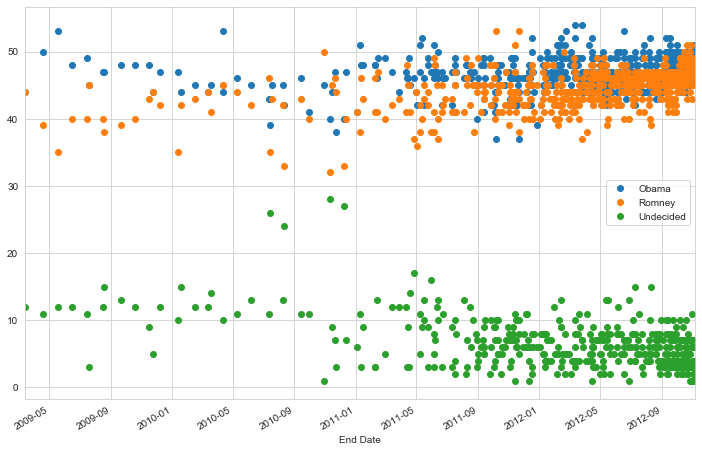

In [14]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', 
             marker='o', figsize=(12, 8))

To lead you along the right path for plotting, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

Now we'll define a new column in our poll_df DataFrame to take into account the difference between Romney and Obama in the polls.

In [15]:
# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration,Difference
585,PPP (D),2009-03-13,2009-03-15,2010-11-08T10:36:31Z,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,1,0.00
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,1,0.11
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,1,0.18
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,1,0.08
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,1,0.09


Great! Keep in mind that the Difference column is Obama minus Romney, thus a positive difference indicates a leaning towards Obama in the polls.

Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [16]:
# Set as_index=Flase to keep the 0,1,2,... index. 
# Then we'll take the mean of the polls on that day.
poll_df = poll_df.groupby(by='Start Date', as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,1,0.09


Great! Now plotting the Differencce versus time should be straight forward.

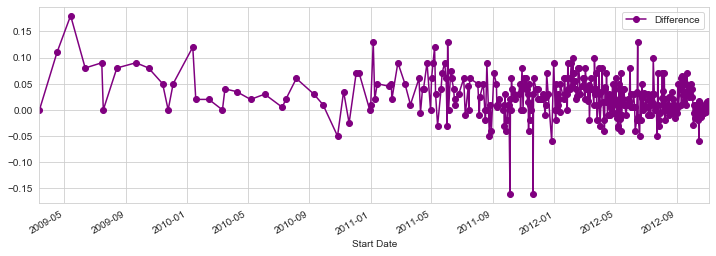

In [17]:
# Plotting the difference in polls between Obama and Romney
poll_df.plot('Start Date', 'Difference', figsize=(12, 4), marker='o', 
             linestyle='-', color='purple')

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

Great now we know where to set our x limits for the month of October in our figure.

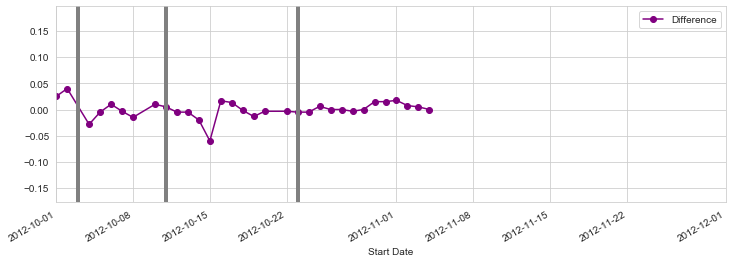

In [18]:
down = pd.to_datetime('2012-10')
up = pd.to_datetime('2012-12')

poll_df.plot('Start Date', 'Difference', figsize=(12, 4), marker='o', linestyle='-', 
             color='purple', xlim=(down, up))

# Now add the debate markers
plt.axvline(x=pd.to_datetime('2012-10-03'), linewidth=4, color='grey')
plt.axvline(x=pd.to_datetime('2012-10-11'), linewidth=4, color='grey')
plt.axvline(x=pd.to_datetime('2012-10-23'), linewidth=4, color='grey')

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election. 

# Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign. 

The questions we will be trying to answer while looking at this Data Set is:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?
    
You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0)

In [19]:
# reading the data
donor_df = pd.read_csv('data/Election_Donor_Data.csv', low_memory=False)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [20]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {donor_df.shape}\n=================================")
print(f"DataFrame info : {donor_df.info()}\n=================================")
print(f"DataFrame columns : \n{donor_df.columns}\n=================================")
print(f"The type of each column : \n{donor_df.dtypes}\n=================================")
print(f"How much missing value in every column : \n{donor_df.isna().sum()}\n=================================")

DataFrame shape : (1001731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB
DataFrame info : None
DataFrame columns : 
Index(['cmte_id', 'cand_id', 'cand_

What might be interesting to do is get a quick glimpse of the donation amounts, and the average donation amount. Let's go ahead and break down the data.

In [21]:
# Get a quick look at the various donation amounts
donor_df.contb_receipt_amt.value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

8079 different amounts! Thats quite a variation. Let's look at the average and the std.

In [22]:
# Get the mean donation
don_mean = donor_df.contb_receipt_amt.mean()

# Get the std of the donation
don_std = donor_df.contb_receipt_amt.std()

print(f"The average donation was {don_mean:.2f} with a std {don_std:.2f}")

The average donation was 298.24 with a std 3749.67


Wow! That's a huge standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [23]:
# Let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df.contb_receipt_amt.copy()

# Now sort it
top_donor.sort_values(inplace=True)

# Then check the Series
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [24]:
# Get rid of the negative values
top_donor = top_donor[top_donor > 0]

# Sort the Series
top_donor.sort_values(inplace=True)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars.

A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10, 20, 50, 100, 500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

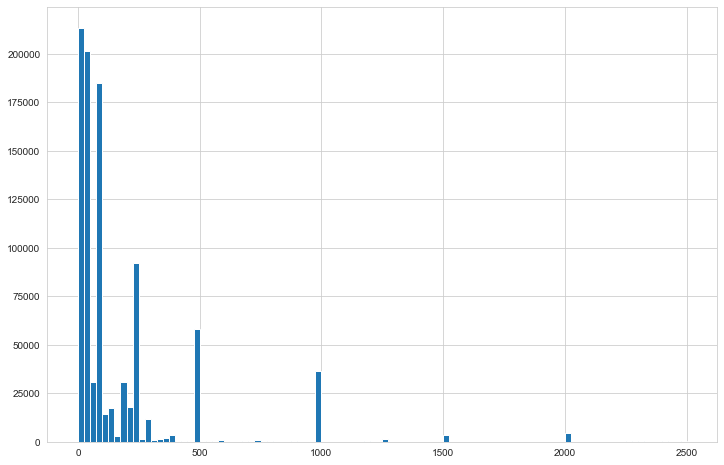

In [25]:
# Create a Series of the common donations limited to 2500
com_donor = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_donor.hist(bins=100, figsize=(12, 8))

Looks like our intuition was right, since we spikes at the round numbers.

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates

In [26]:
# get the candidate names
candidate = donor_df.cand_nm.unique()
candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations. 

In [27]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}

# Now map the party with candidate 
donor_df['Party'] = donor_df['cand_nm'].map(party_map)

Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.

In [28]:
# Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [29]:
# Groupby candidate and then displayt the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Clearly Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.

In [30]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

This isn't super readable, and an important aspect of data science is to clearly present information. How about just a quick graphic presentation?

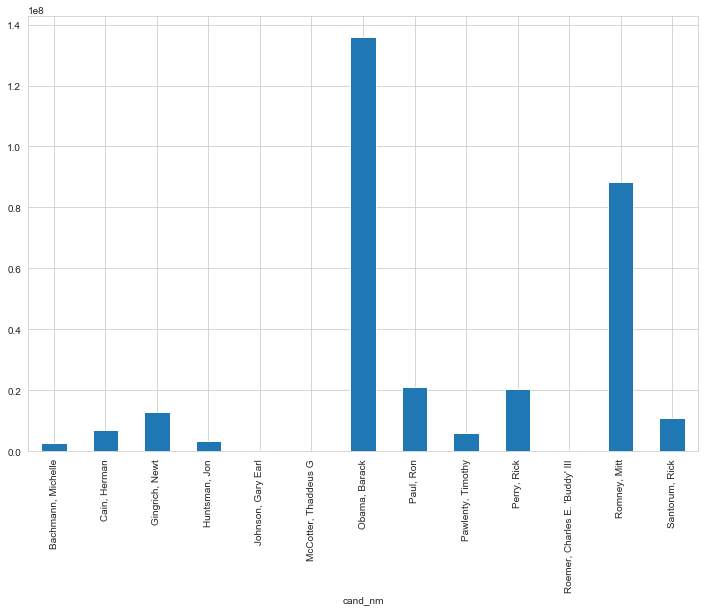

In [31]:
# Plot the total donation amount
cand_amt = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
cand_amt.plot(kind='bar', figsize=(12, 8))

Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

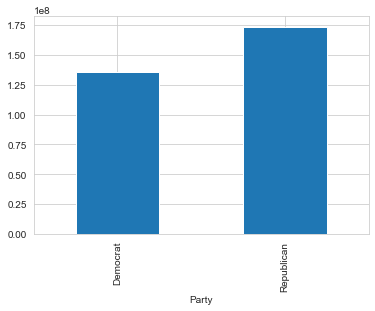

In [32]:
# group party than compute donation 
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the **donor_df** DataFrame and then using **pivot_table** to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). Finally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [33]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', 
                                     columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [34]:
# Check the size of occupation_df
print(f"We have {occupation_df.shape[0]} occupations.")

We have 45067 occupations.


Wow! This is probably far too large to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.

In [35]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

# Checking the size
occupation_df.shape

(31, 2)

Great! This looks much more manageable! Now let's visualize it.

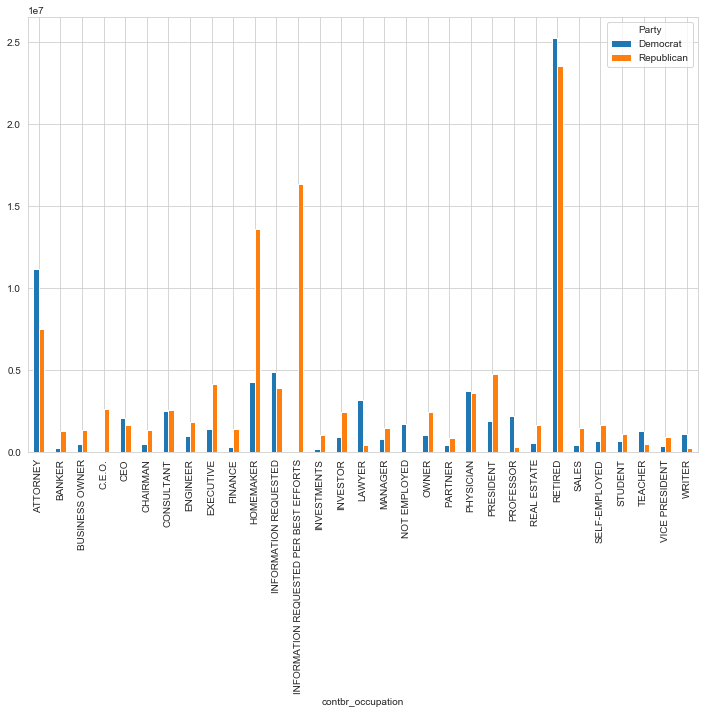

In [36]:
# plotting occupation
occupation_df.plot(kind='bar', figsize=(12, 8))

This is a bit hard to read, so let's use kind = 'barh' (horizontal) to set the ocucpation on the correct axis.

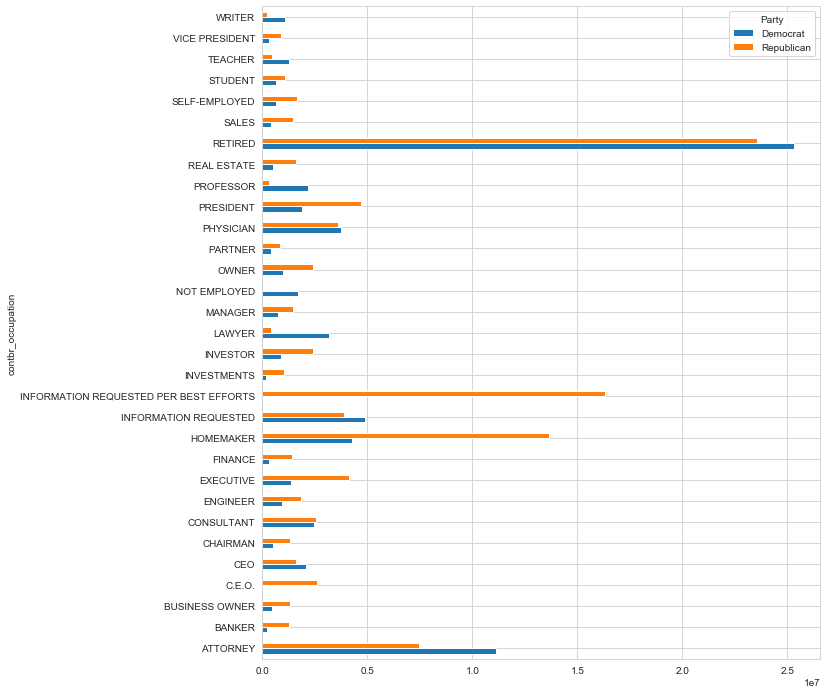

In [37]:
occupation_df.plot(kind='barh', figsize=(10, 12))

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [38]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], axis=0,
                  inplace=True)

In [39]:
# Let combine 'CEO' with 'C.E.O'
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True, axis=0)

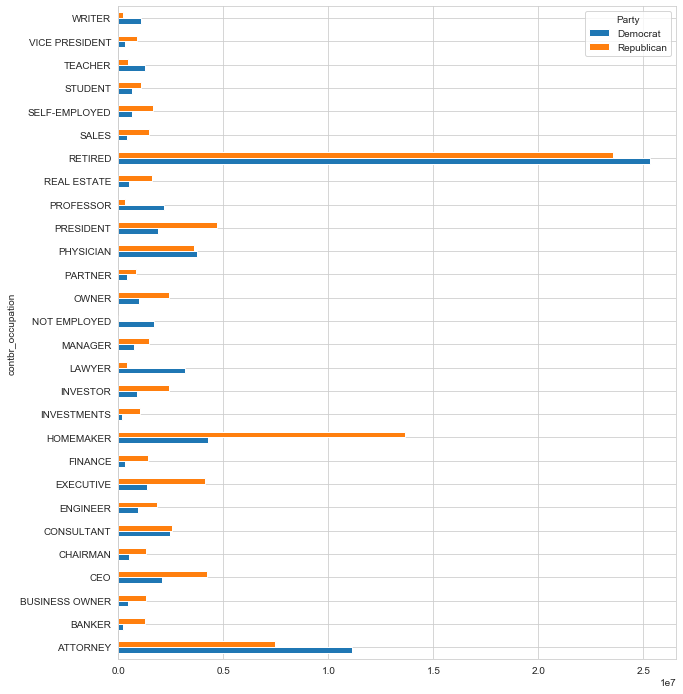

In [40]:
occupation_df.plot(kind='barh', figsize=(10, 12))

Awesome! Looks like CEOs are a little more conservative leaning, this may be due to the  tax philosphies of each party during the election.